In [1]:
import pandas as pd

In [4]:
filenames = ['C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2020-01.csv', 'C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2020-07.csv','C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2019-01.csv','C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2019-07.csv']
all_dfs = []
for one_filename in filenames:
    print(one_filename)
    all_dfs.append(pd.read_csv(one_filename, usecols = ['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'fare_amount','extra','mta_tax','tip_amount','tolls_amount', 'improvement_surcharge','total_amount','congestion_surcharge'], 
                               parse_dates = ['tpep_pickup_datetime']))    

C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2020-01.csv
C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2020-07.csv
C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2019-01.csv
C:/Users/thinkbook/Desktop/programmation2/nyc_taxi_2019-07.csv


In [5]:
df=pd.concat(all_dfs)
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,1.0,1.20,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,2020-01-01 00:35:39,1.0,1.20,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,2020-01-01 00:47:41,1.0,0.60,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,2020-01-01 00:55:23,1.0,0.80,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2020-01-01 00:01:58,1.0,0.00,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,NaN,3.86,19.83,2.75,0.0,0.00,6.12,0.3,29.00,0.0
6310415,2019-07-29 16:07:57,NaN,15.48,51.38,2.75,0.0,0.00,0.00,0.3,54.43,0.0
6310416,2019-07-29 16:01:31,NaN,12.92,62.35,2.75,0.0,0.00,0.00,0.3,65.40,0.0
6310417,2019-07-29 16:58:00,NaN,7.12,39.45,2.75,0.5,0.00,0.00,0.3,43.00,0.0


<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

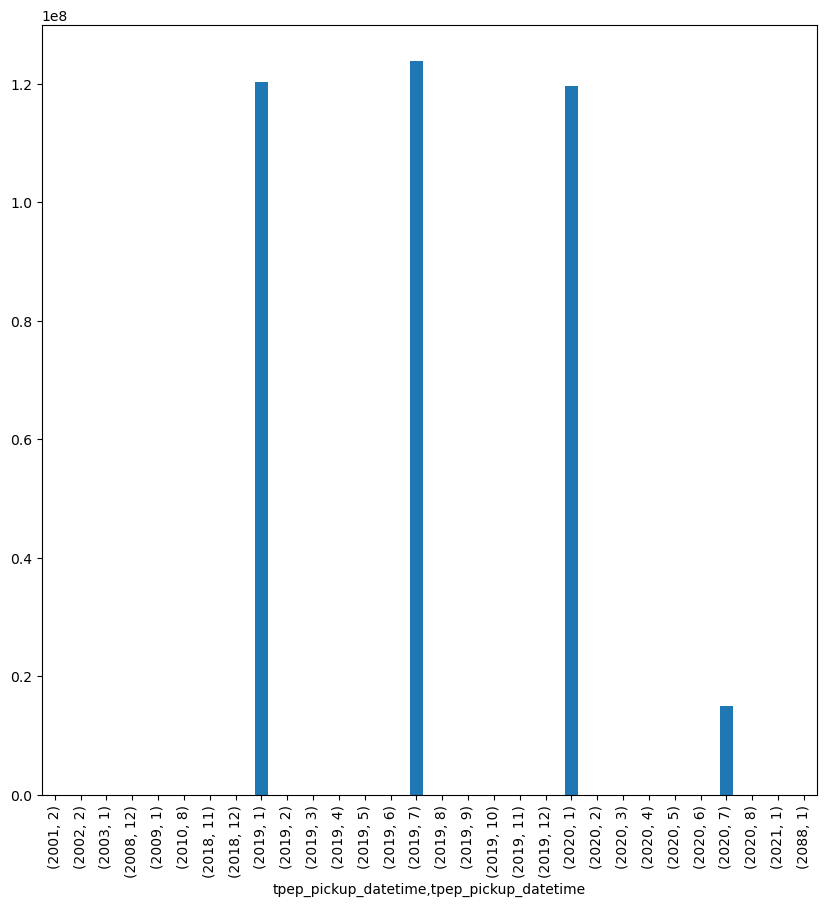

In [12]:
df.groupby([df['tpep_pickup_datetime'].dt.year,df['tpep_pickup_datetime'].dt.month])['total_amount'].sum().plot.bar(figsize=(10,10))

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

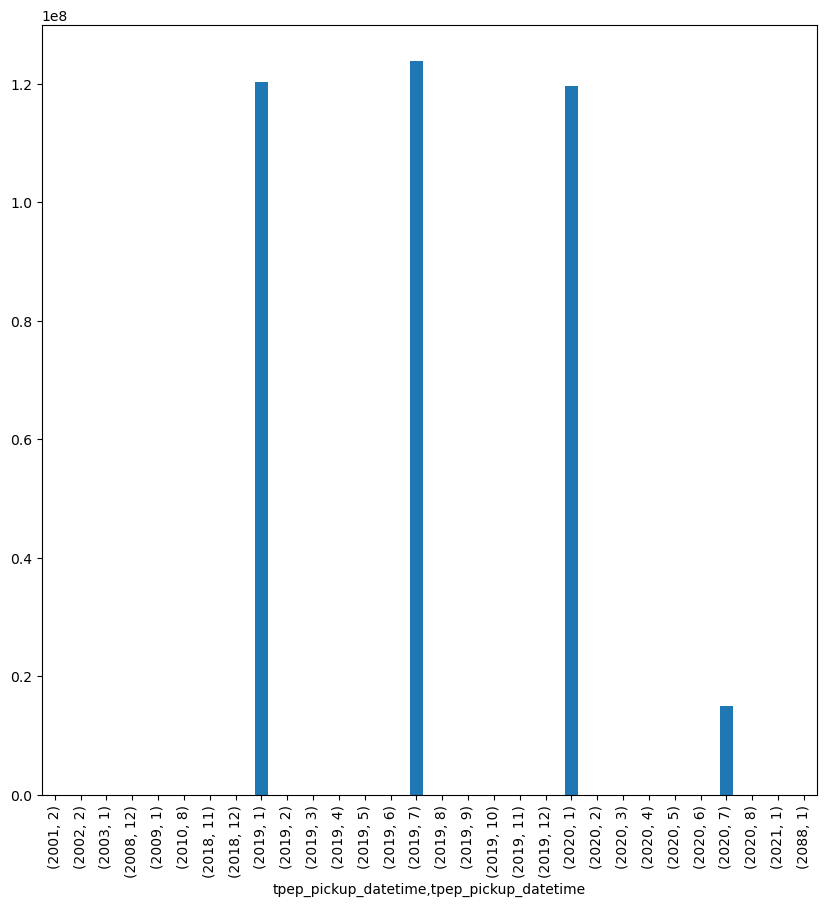

In [11]:
df.groupby([df['tpep_pickup_datetime'].dt.year,df['tpep_pickup_datetime'].dt.month])[['fare_amount','extra','mta_tax','tip_amount','total_amount']].sum().plot.bar(figsize=(10,10))

<Axes: xlabel='tpep_pickup_datetime,tpep_pickup_datetime'>

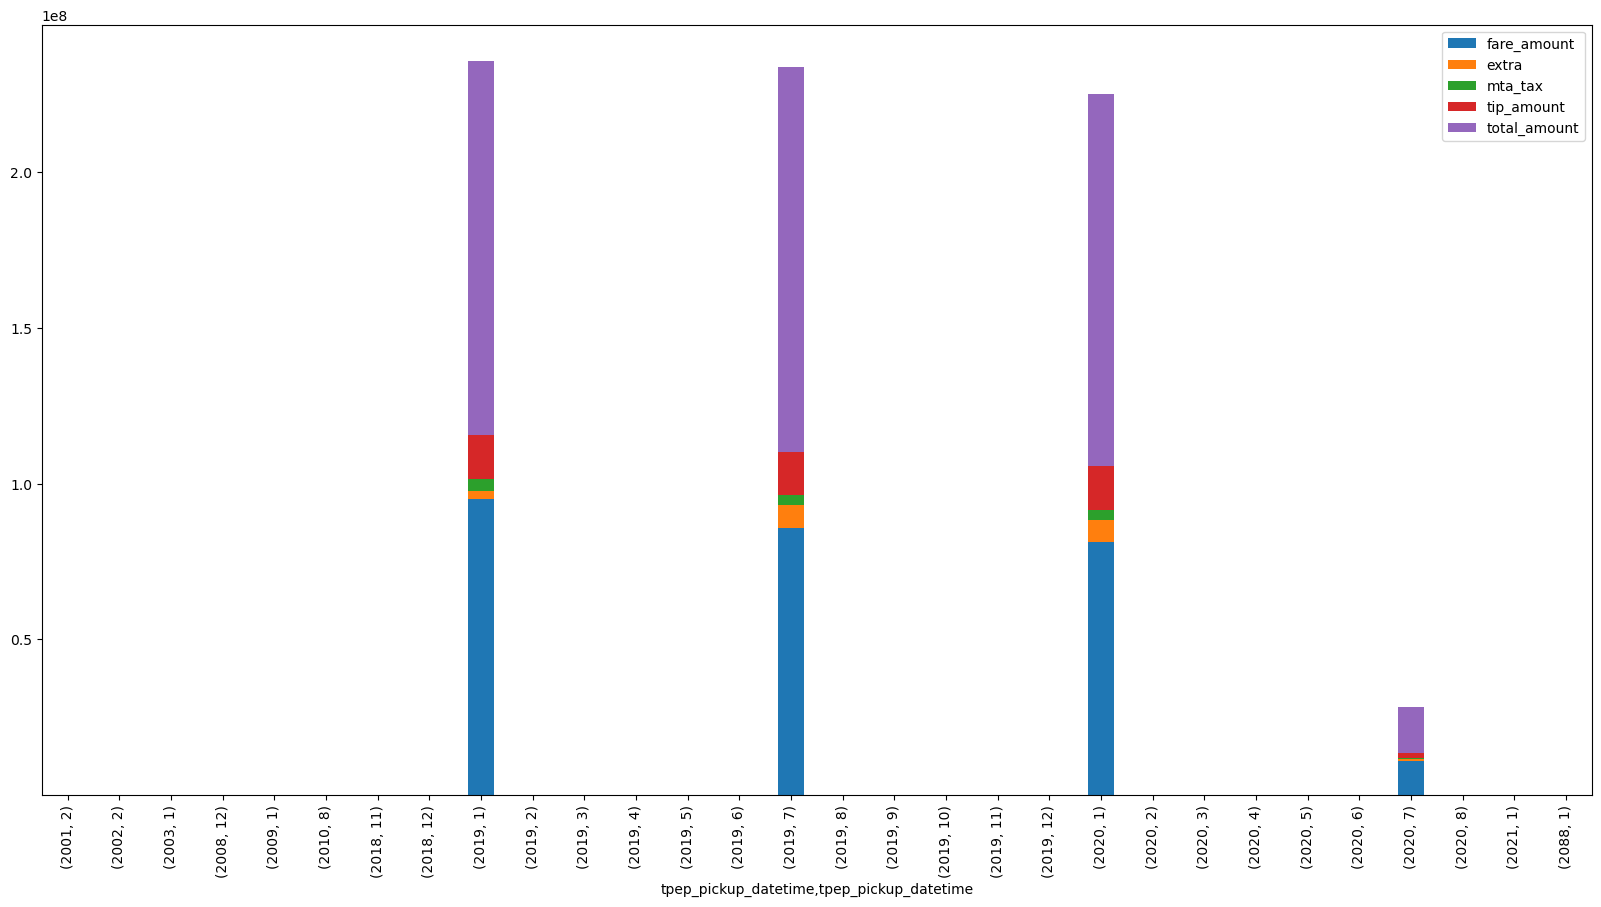

In [15]:

df.groupby([df['tpep_pickup_datetime'].dt.year,df['tpep_pickup_datetime'].dt.month])[['fare_amount','extra','mta_tax','tip_amount','total_amount']].sum().plot.bar(stacked=True,figsize=(20,10))

<Axes: xlabel='passenger_count'>

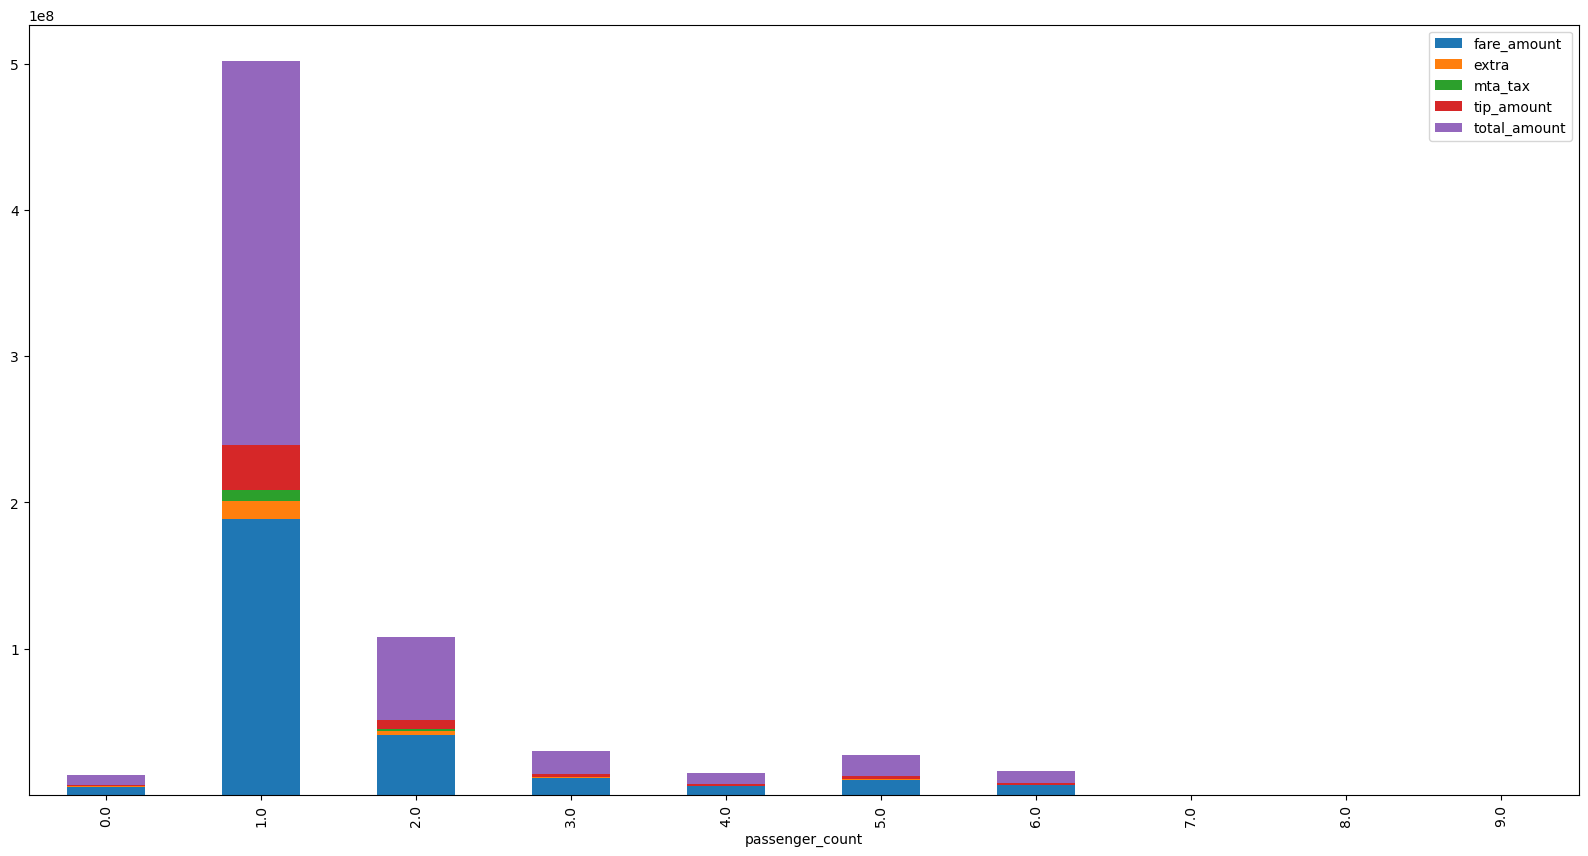

In [16]:
df.groupby(df['passenger_count'])[['fare_amount','extra','mta_tax','tip_amount','total_amount']].sum().plot.bar(stacked=True,figsize=(20,10))

In [17]:
df=df[df['fare_amount']>0]
df

,tpep_pickup_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2020-01-01 00:28:15,1.0,1.20,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,2020-01-01 00:35:39,1.0,1.20,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,2020-01-01 00:47:41,1.0,0.60,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,2020-01-01 00:55:23,1.0,0.80,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2020-01-01 00:01:58,1.0,0.00,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6310414,2019-07-29 16:34:53,NaN,3.86,19.83,2.75,0.0,0.00,6.12,0.3,29.00,0.0
6310415,2019-07-29 16:07:57,NaN,15.48,51.38,2.75,0.0,0.00,0.00,0.3,54.43,0.0
6310416,2019-07-29 16:01:31,NaN,12.92,62.35,2.75,0.0,0.00,0.00,0.3,65.40,0.0
6310417,2019-07-29 16:58:00,NaN,7.12,39.45,2.75,0.5,0.00,0.00,0.3,43.00,0.0
